In [35]:
import catboost
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
train_dataset=pd.read_csv('train.csv')

In [17]:
train_dataset.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [18]:
train_dataset.shape

(188318, 132)

In [19]:
train_dataset.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [20]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188318.0,294135.982561,169336.084867,1.000000,147748.250000,294539.500000,440680.500000,587633.000000
cont1,188318.0,0.493861,0.187640,0.000016,0.346090,0.475784,0.623912,0.984975
cont2,188318.0,0.507188,0.207202,0.001149,0.358319,0.555782,0.681761,0.862654
cont3,188318.0,0.498918,0.202105,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,188318.0,0.491812,0.211292,0.176921,0.327354,0.452887,0.652072,0.954297
cont5,188318.0,0.487428,0.209027,0.281143,0.281143,0.422268,0.643315,0.983674
cont6,188318.0,0.490945,0.205273,0.012683,0.336105,0.440945,0.655021,0.997162
cont7,188318.0,0.484970,0.178450,0.069503,0.350175,0.438285,0.591045,1.000000
cont8,188318.0,0.486437,0.199370,0.236880,0.312800,0.441060,0.623580,0.980200
cont9,188318.0,0.485506,0.181660,0.000080,0.358970,0.441450,0.566820,0.995400


In [21]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [22]:
test_dataset=pd.read_csv('test.csv')

In [23]:
test_dataset

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,587617,A,A,A,B,A,A,A,A,A,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,A,A,A,A,B,B,A,B,A,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,B,B,A,A,B,A,A,A,B,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,A,A,A,A,A,B,A,B,A,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [24]:
train_dataset['isTrain']=True
test_dataset['isTrain']=False

In [26]:
dataset=pd.concat([train_dataset,test_dataset],axis=0)

In [28]:
dataset.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,isTrain
125541,587617,A,A,A,B,A,A,A,A,A,...,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946,NaN,False
125542,587621,A,A,A,A,B,B,A,B,A,...,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576,NaN,False
125543,587627,B,B,A,A,B,A,A,A,B,...,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125,NaN,False
125544,587629,A,A,A,A,A,B,A,B,A,...,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542,NaN,False
125545,587634,A,B,A,A,A,A,A,A,B,...,0.242044,0.25461,0.31399,0.25183,0.245410,0.241676,0.287682,0.220323,NaN,False


In [33]:
cat_pattern=re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
count_pattern=re.compile("^count([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cat_col=sorted([cat for cat in train_dataset.columns if 'cat' in cat],key=lambda s:int(s[3:]))
cat_col


['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

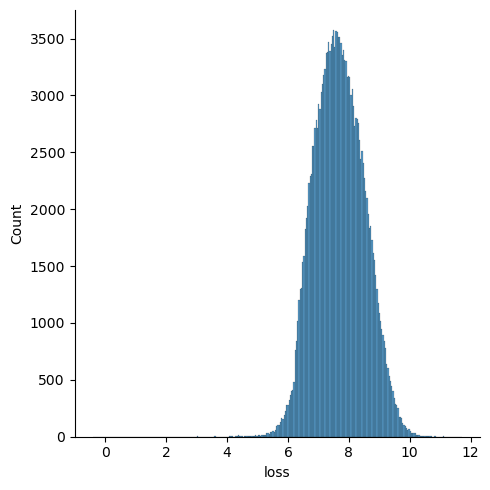

In [37]:
sns.displot(np.log(train_dataset['loss']))

In [38]:
from sklearn.model_selection import train_test_split